# Jupyter Notebook to demonstrate (simple) **Linear Regression** for Advertising/Sales Prediction

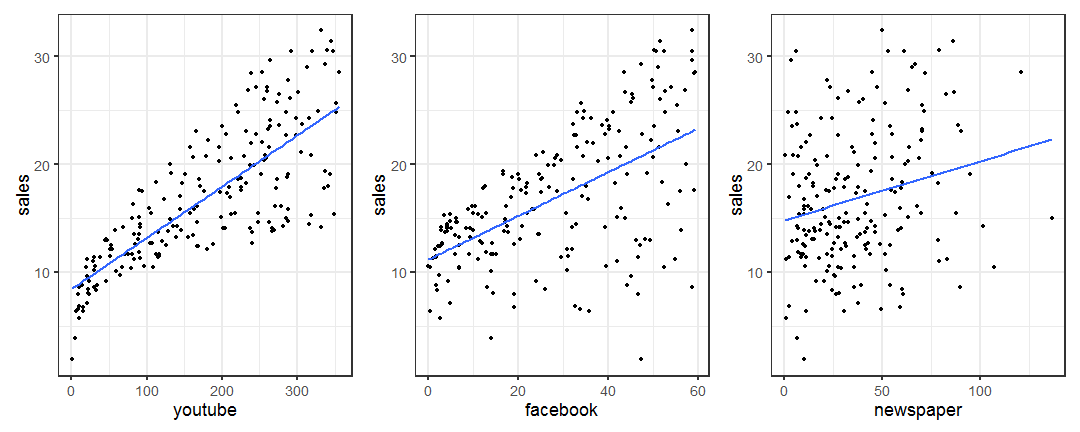

Linear Regression is a simple yet powerful and mostly used algorithm in data science. There are a plethora of real-world applications of Linear Regression.

The purpose of this tutorial/notebook is to get a clear idea on how a linear regression can be used to solve a marketing problem, such as selecting the right channels to advertise a product.

Problem Statement and Example Data: Build a model which predicts sales based on the money spent on different platforms for marketing. Using this notebook, we will build a linear regression model to predict Sales using an appropriate predictor variable, based on the advertising dataset.


Sources:
* [Kaggle](https://www.kaggle.com) Multiple Lineare Regression Notebooks and Tutorials
* [Analytics Vidhya Blog](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/) "Everything you need to Know about Linear Regression"
* [CodeSource](https://codesource.io/building-a-regression-model-to-predict-sales-revenue-using-sci-kit-learn/) "Building a Regression Model to Predict Sales Revenue using Sci-Kit Learn"

---
Author:
*   dr.daniel benninger  [> Linkedin](https://www.linkedin.com/in/danielbenninger/)

History:
*  v1, June 2021, dbe --- adapted version for CAS DA4
*  v2, April 2023, dbe --- minor adaptions for BINA FS23
*  v3, April 2024, dbe --- minor corrections for BINA FS24


---

## Setup Environment  - Load necessary Libraries and Functions

First, we need to import some libraries:  
* pandas: data manipulation and analysis
* numpy : library for scientific computing in Python, used for working with arrays and matrices
* matplotlib : plotting library for data visualization
* rcParams: To change the matplotlib properties like figure size
* seaborn: data visualization library based on matplotlib

* sklearn: xxx
* statsmodels: Using statsmodels module classes and functions for linear regression

   
> Make sure they are installed already before importing them

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Import the data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

# configure plot area
rcParams['figure.figsize'] = 12, 8

## Reading and Understanding the Data

In [ ]:
# Input data files - in colab environment  - are available in the "/content/sample_data" directory.
# For example: check the current files in the input directory

fileURL = "https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB06-Regression%2BTimeSeries/Python/DATA_Werbung.csv"
advertising = pd.read_csv(fileURL)

## Data Inspection

In [ ]:
advertising.shape

(200, 5)

In [ ]:
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
advertising.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


---
## Data Cleaning & Analysis

In [ ]:
# Checking for NaN values
advertising.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
# Checking for Null values
advertising.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Note: There are no *NULL* values in the dataset, hence it is clean.

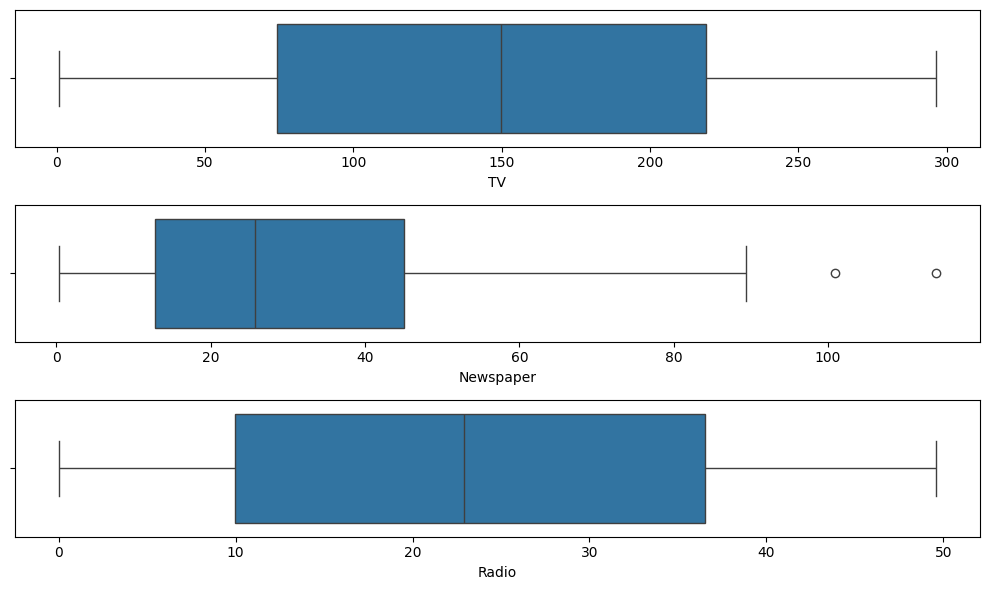

In [ ]:
# Analysis with Box-Whisker Plots (Lageparameter Analyse)
fig, axs = plt.subplots(3, figsize = (10,6))

plt1 = sns.boxplot(advertising['TV'], ax = axs[0],orient='h')
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1],orient='h')
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2],orient='h')

plt.tight_layout()

Note: There are no considerable *outliers* present in the data.

---  
## Diagnostic Analytics - Exploratory Data Analysis

### Univariate Analysis
Focus on the **Sales** (Target) Variable

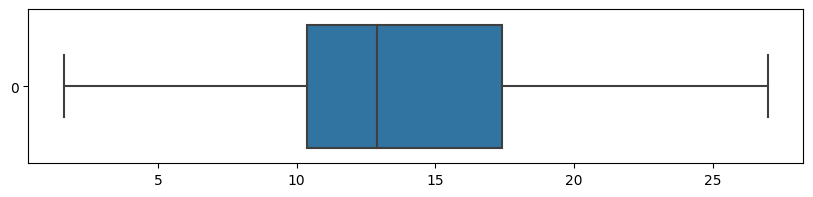

In [ ]:
# Analysis with Box-Whisker Plots (Lageparameter Analyse)
fig, axs = plt.subplots(1, figsize = (10,2))

sns.boxplot(advertising['Sales'],orient='h')
plt.show()

### Bivariate Analysis
Focus on Observation (`TV`, `Newspaper`, `Radio`) and Target (`Sales`) Variable combinations

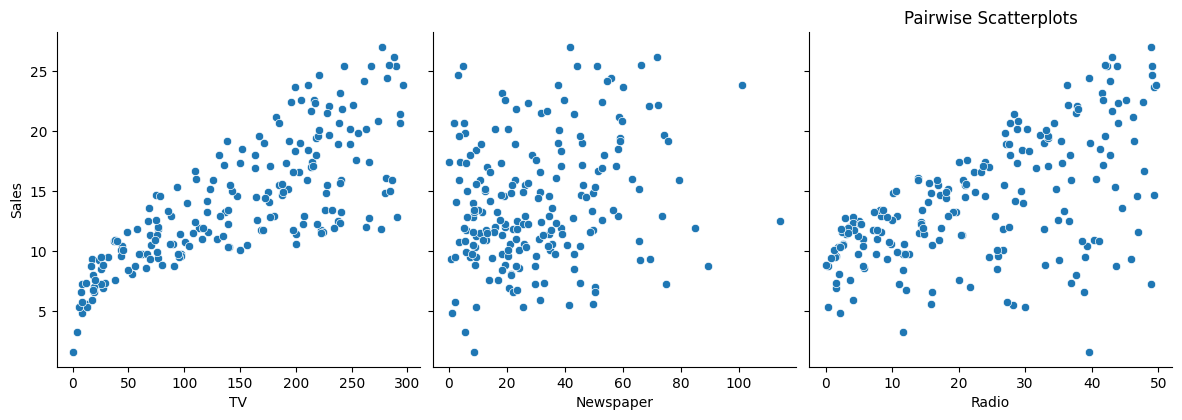

In [ ]:
# Analysis with Scatterplot (Pairplots)
# Let's see how Sales are related with other variables

sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.title('Pairwise Scatterplots')

plt.figsize = (10,5)
plt.show()

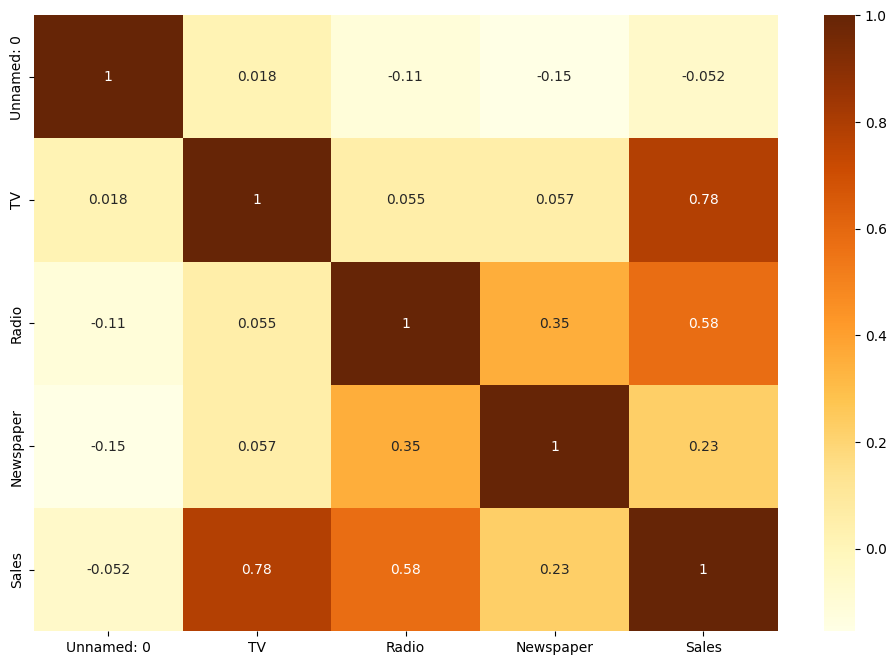

In [ ]:
# Analysis with Heatmap plot
# Let's see the correlation between different variables

sns.heatmap(advertising.corr(), cmap="YlOrBr", annot = True)

plt.show()

Note: As is visible from the *pairplot* and the *heatmap*, the variable `TV` seems to be most correlated with `Sales`.   
So let's go ahead and perform **simple linear regression** using `TV` as our feature variable.

---  
## Model Building - Linear Regression
---
#### Performing **Simple Linear Regression**
The equation of linear regression:<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response (*target*)
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature (*observation*)
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in Model Building
1) We first assign
* the feature (**observation**)  (`TV`, in this case) to the **variable `X`**     
* and the response (**target**) variable (`Sales`) to the **variable `y`**.

In [ ]:
X = advertising['TV']
Y = advertising['Sales']

2) Then split Dataset into Train-Test Parts

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
# Let's have a look at the TRAIN dataset
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [ ]:
Y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

### Build a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [ ]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`.  

And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the **Ordinary Least Squares** (`OLS`) attribute of `statsmodels` as shown below

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the Regression Line using 'OLS' (ordinary least square)
lr = sm.OLS(Y_train, X_train_sm).fit()


In [ ]:
# Print the regression parameters,
# i.e. the intercept and the slope of the fitted regression line
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           2.84e-30
Time:                        08:25:07   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

####  Key Statistics of the Linear Model
Looking at the key values from the summary above of the linear model, we are concerned with:   
1. The coefficients and significance (**p-values**)
2. **R-squared**
3. **F statistic** and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
*The coefficient is statistically significant*. So the association is not purely by chance.

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

*This is a decent R-squared value.*

##### 3. F statistic has a very low p value (practically low)
Meaning that *the model fit is statistically significant*, and the explained variance isn't purely by chance.

---
> Note: **The fit is significant**  
Let's visualize how well the model fit the data.  
From the parameters that we get, our linear regression equation becomes:

> $ Sales = 6.989 + 0.0465 \times TV $

---

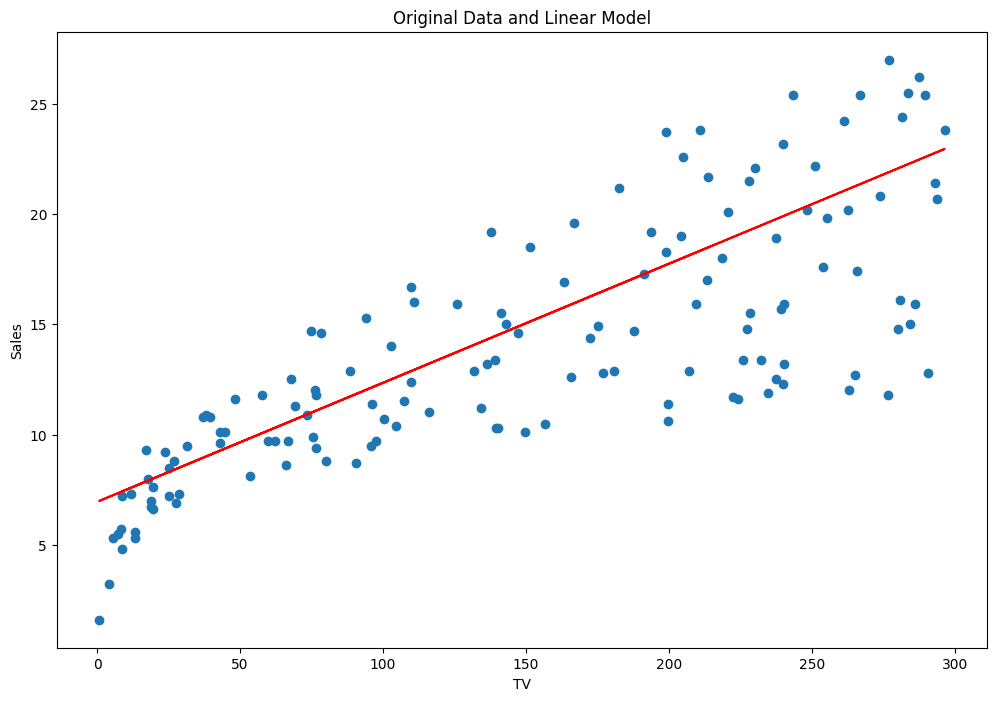

In [ ]:
# Visualize Orginal Data and Linear Model

plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')

plt.title('Original Data and Linear Model')
plt.figsize = (10,5)

# Set x-axis label
plt.xlabel('TV')
# Set y-axis label
plt.ylabel('Sales')

plt.show()

## Model Evaluation

**Residual analysis**, to validate assumptions of the model, and hence the reliability for inference

#### Distribution of the Error Terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the *histogram of the error terms* and see what it looks like.

In [ ]:
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)

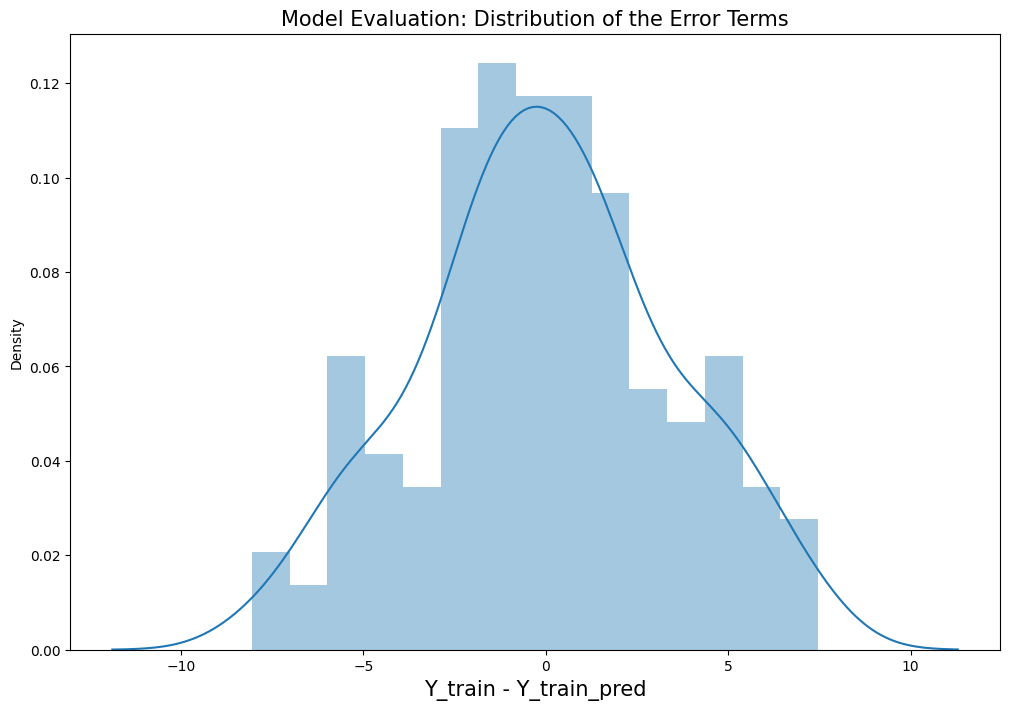

In [ ]:
plt.figure()
sns.distplot(res, bins = 15)

plt.title('Model Evaluation: Distribution of the Error Terms', fontsize = 15)
plt.xlabel('Y_train - Y_train_pred', fontsize = 15)         # X-label

plt.figsize = (10,5)
plt.show()

> Note: The residuals are following the *normally distributed with a mean 0*. All good!

#### Looking for Patterns in the Residuals

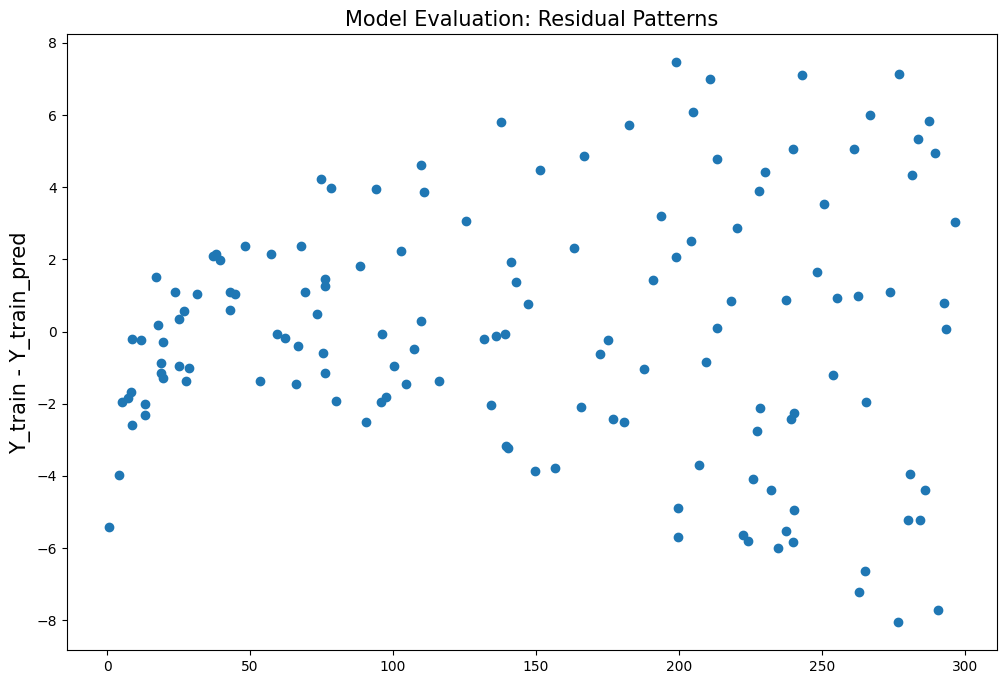

In [ ]:
plt.scatter(X_train,res)

plt.title('Model Evaluation: Residual Patterns', fontsize = 15)
plt.ylabel('Y_train - Y_train_pred', fontsize = 15)         # Y-label

plt.figsize = (10,5)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.
**Although**, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.  

As you can see, the regression line is a pretty good fit to the data!

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

##### 1. Looking at the Root Mean Squared Error (RMSE) on the test set

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Returns the mean squared error (RMSE); we'll take a square root
RMSE = np.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error (RMSE): ', RMSE)

Root Mean Squared Error (RMSE):  2.8241456288327003


##### 2. Checking the R-squared on the test set

In [ ]:
r_squared = r2_score(Y_test, y_pred)
print('R-squared: ',r_squared)

R-squared:  0.5942987267783303


##### 3. Visualizing the Fit on the Test Set

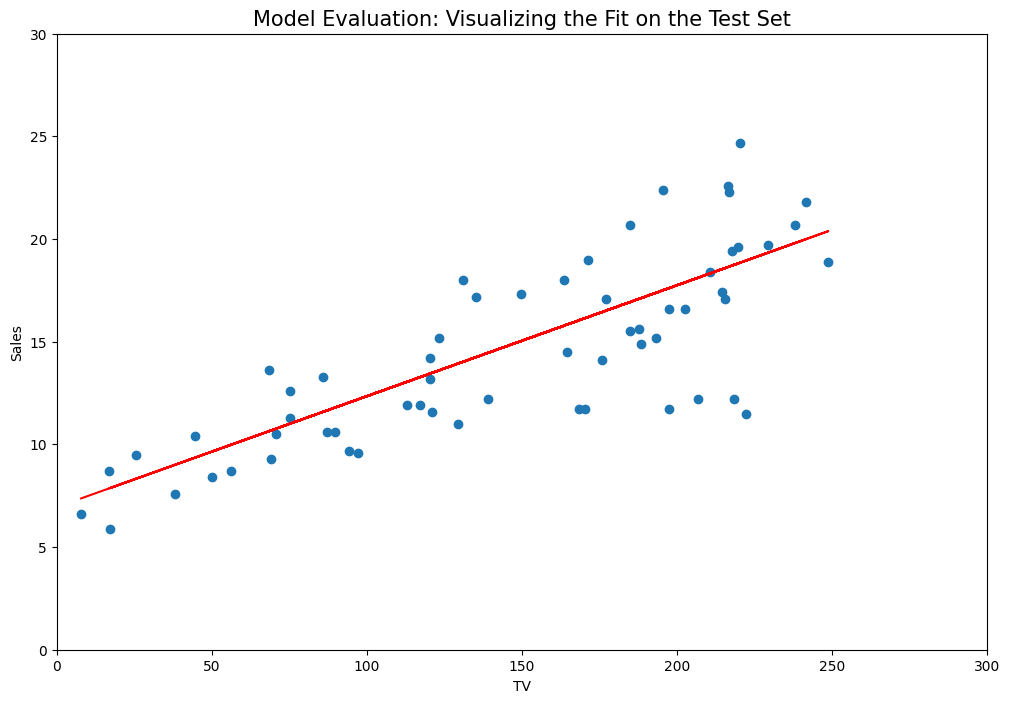

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')

plt.title('Model Evaluation: Visualizing the Fit on the Test Set', fontsize = 15)

plt.ylabel('Sales')         # Y-label
plt.ylim([0, 30])

plt.xlabel('TV')            # X-label
plt.xlim([0, 300])

plt.figsize = (10,5)
plt.show()

---

## Model Deployment

1) Define Linear Model Function

In [ ]:
def lr_model_prediction (Xarg):
   intercept = 6.948
   coeff_X = 0.054

   result = intercept + coeff_X * Xarg
   return result

2) Apply Linear Model Function to new observation values

In [ ]:
# simulate sales for a new TV advertising volume
TV_ads = 275
print('Sales Prediction:',lr_model_prediction(TV_ads),' for TV ads volume: ', TV_ads)

Sales Prediction: 21.798000000000002  for TV ads volume:  275


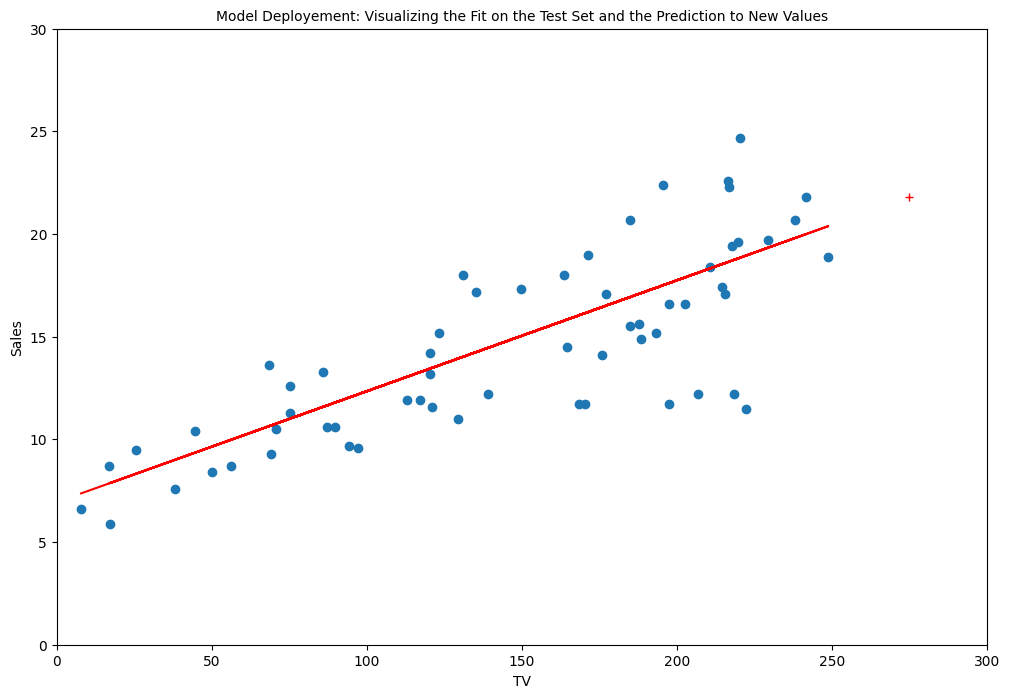

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')

plt.plot(TV_ads, lr_model_prediction(TV_ads), 'r+')

plt.title('Model Deployement: Visualizing the Fit on the Test Set and the Prediction to New Values', fontsize = 10)

plt.ylabel('Sales')         # Y-label
plt.ylim([0, 30])

plt.xlabel('TV')            # X-label
plt.xlim([0, 300])

plt.figsize = (10,5)
plt.show()